# Toy Experiments

In [227]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def env_1(x):
    return (x+1)*(x)

In [3]:
def env_2(x):
    return (x-5)*(x-4)

In [214]:
class Adam():
    def __init__(self):
        self.beta_1 = 0.9
        self.beta_2 = 0.999
        self.epsilon = 1e-8
        self.m_t = 0 
        self.v_t = 0 
        self.t = 0
        
    def step(self, g_t):
        self.t+=1
        self.m_t = self.beta_1*self.m_t + (1-self.beta_1)*g_t
        self.v_t = self.beta_2*self.v_t + (1-self.beta_2)*(g_t*g_t)
        m_hat = self.m_t/(1-(self.beta_1**self.t))
        v_hat = self.v_t/(1-(self.beta_2**self.t))
        
        return m_hat/(np.sqrt(v_hat)+self.epsilon)

## 1D visualization

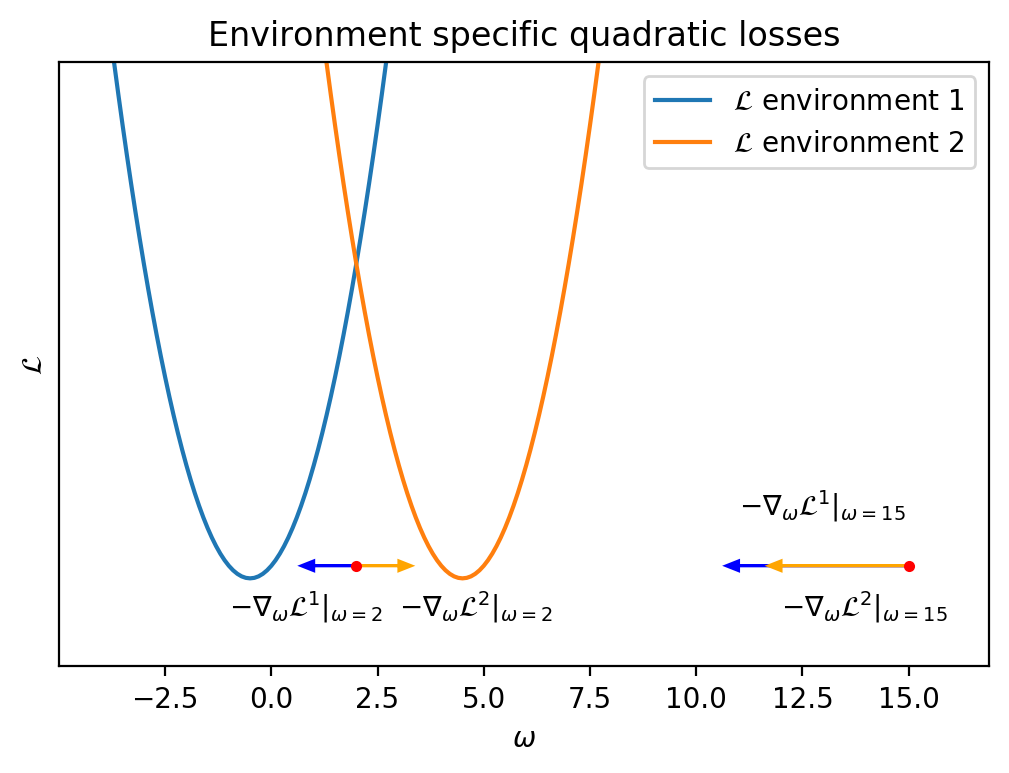

In [5]:
x_min = -4
x_max = 16
plt.figure(figsize=(6,4), dpi=200)
plt.ylim(-2, 10)
plt.title("Environment specific quadratic losses")
plt.plot(np.arange(x_min,x_max, 0.1), [env_1(x) for x in np.arange(x_min,x_max, 0.1)], 
         label="$\mathcal{L}$ environment 1")
plt.plot(np.arange(x_min,x_max, 0.1), [env_2(x) for x in np.arange(x_min,x_max, 0.1)], 
         label="$\mathcal{L}$ environment 2")
plt.yticks([])
# Arrows in 15
plt.arrow(15, 0, -4, 0, head_width=0.2, color="blue")
plt.arrow(15, 0, -3, 0, head_width=0.2, color="orange")
plt.text(11, 1, r'$-\nabla_\omega\mathcal{L}^1|_{\omega = 15}$')
plt.text(12, -1, r'$-\nabla_\omega\mathcal{L}^2|_{\omega = 15}$')
# Arrows in 2
plt.arrow(2, 0, -1, 0, head_width=0.2, color="blue")
plt.arrow(2, 0, 1, 0, head_width=0.2, color="orange")
plt.text(-1, -1, r'$-\nabla_\omega\mathcal{L}^1|_{\omega = 2}$')
plt.text(3, -1, r'$-\nabla_\omega\mathcal{L}^2|_{\omega = 2}$')
plt.xlabel("$\omega$")
plt.ylabel("$\mathcal{L}$")
plt.legend()
# Marker
plt.plot([2],[0], marker=".", color="red")
plt.plot([15],[0], marker=".", color="red")
plt.show()

## Quadratic landscapes with two environments

(10, 10)


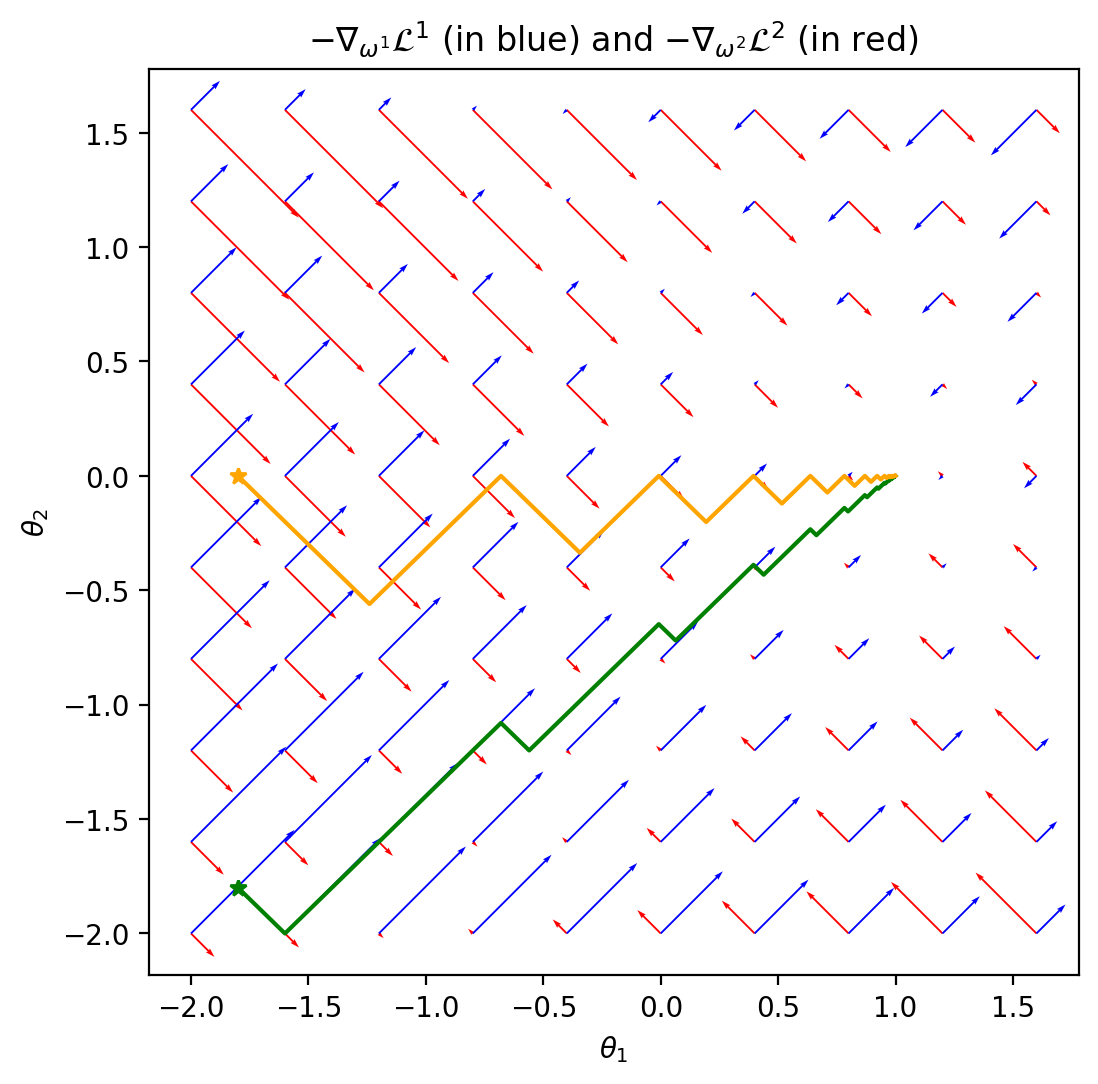

In [54]:
plt.figure(figsize=(6,6), dpi=200)

# Optimization trajectory
lr = 0.2
pt = [-1.8, -1.8]
pt_new = [-1.8, -1.8]
plt.plot(pt[0],pt[1], marker="*", color="green")
all_points = []
all_points.append(pt_new.copy())
for _ in range(20):
    pt_new[0] = pt[0] + lr*(-pt[0] +1 + pt[1])  # Update by env1
    pt_new[1] = pt[1] + lr*(pt[0] - 1 - pt[1])  # Update by env1
#     import pdb
#     pdb.set_trace()
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
    pt_new[0] = pt[0] + lr*(-pt[0] +1 - pt[1])  # Update by env2
    pt_new[1] = pt[1] + lr*(-pt[0] +1 - pt[1])  # Update by env2
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
plt.plot([pt[0] for pt in all_points], [pt[1] for pt in all_points], color="green")
#         label="trajectory from (-1.8, -1.8)")

# Optimization trajectory 2
lr = 0.2
pt = [-1.8, 0]
pt_new = [-1.8, 0]
plt.plot(pt[0],pt[1], marker="*", color="orange")
all_points = []
all_points.append(pt_new.copy())
for _ in range(20):
    pt_new[0] = pt[0] + lr*(-pt[0] +1 + pt[1])  # Update by env1
    pt_new[1] = pt[1] + lr*(pt[0] - 1 - pt[1])  # Update by env1
#     import pdb
#     pdb.set_trace()
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
    pt_new[0] = pt[0] + lr*(-pt[0] +1 - pt[1])  # Update by env2
    pt_new[1] = pt[1] + lr*(-pt[0] +1 - pt[1])  # Update by env2
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
plt.plot([pt[0] for pt in all_points], [pt[1] for pt in all_points], color="orange")
#          label="trajectory from (-1.8, 0)")


X, Y = np.meshgrid(np.arange(-2, 2, .4), np.arange(-2, 2, .4))
U1 = -(X-1 - Y)
V1 = (X-1 - Y)
print(U1.shape)
U2 = -(X-1 + Y)
V2 = -(X-1 + Y)
plt.quiver(X, Y, U1, V1, width=0.002, color="red")
plt.quiver(X, Y, U2, V2, width=0.002, color="blue")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
# plt.legend()
plt.title(r"$-\nabla_{\omega^1}\mathcal{L}^1$ (in blue) and $-\nabla_{\omega^2}\mathcal{L}^2$ (in red)")
plt.show()

(10, 20)


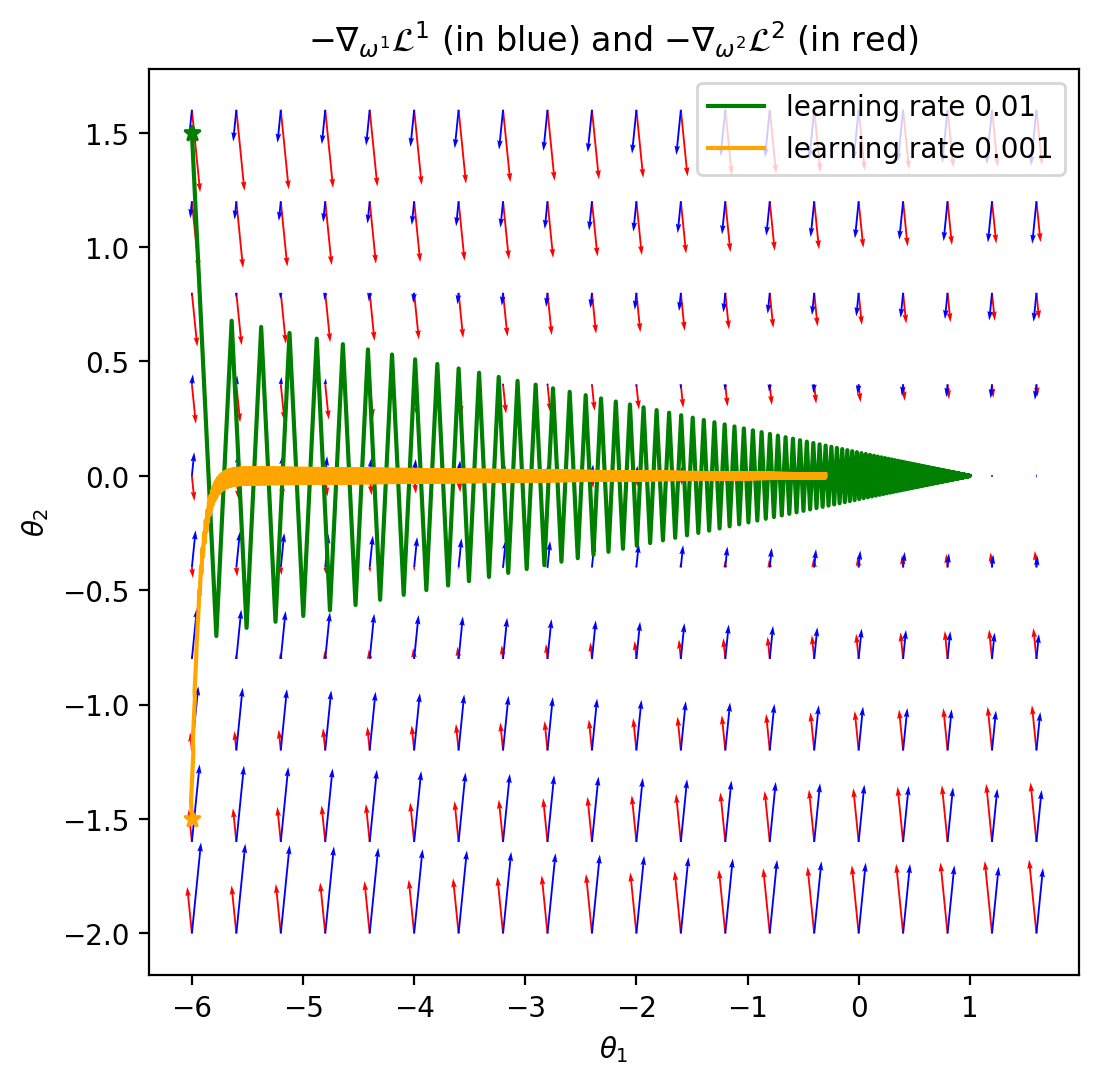

In [79]:
plt.figure(figsize=(6,6), dpi=200)
beta = 10

# Optimization trajectory
lr = 0.01
pt = [-6, 1.5]
pt_new = [-6, 1.5]
plt.plot(pt[0],pt[1], marker="*", color="green")
all_points = []
all_points.append(pt_new.copy())
for _ in range(200):
    pt_new[0] = pt[0] + lr*(-pt[0] +1 + beta*pt[1])  # Update by env1
    pt_new[1] = pt[1] + lr*beta*(pt[0] - 1 - beta*pt[1])  # Update by env1
#     import pdb
#     pdb.set_trace()
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
    pt_new[0] = pt[0] + lr*(-pt[0] +1 - beta*pt[1])  # Update by env2
    pt_new[1] = pt[1] + lr*beta*(-pt[0] +1 - beta*pt[1])  # Update by env2
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
plt.plot([pt[0] for pt in all_points], [pt[1] for pt in all_points], color="green", label="learning rate 0.01")

# Optimization trajectory 2
lr = 0.001
pt = [-6, -1.5]
pt_new = [-6, -1.5]
plt.plot(pt[0],pt[1], marker="*", color="orange")
all_points = []
all_points.append(pt_new.copy())
for _ in range(800):
    pt_new[0] = pt[0] + lr*(-pt[0] +1 + beta*pt[1])  # Update by env1
    pt_new[1] = pt[1] + lr*beta*(pt[0] - 1 - beta*pt[1])  # Update by env1
#     import pdb
#     pdb.set_trace()
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
    pt_new[0] = pt[0] + lr*(-pt[0] +1 - beta*pt[1])  # Update by env2
    pt_new[1] = pt[1] + lr*beta*(-pt[0] +1 - beta*pt[1])  # Update by env2
    all_points.append(pt_new.copy())
    pt = pt_new.copy()
plt.plot([pt[0] for pt in all_points], [pt[1] for pt in all_points], color="orange", label="learning rate 0.001")

X, Y = np.meshgrid(np.arange(-6, 2, .4), np.arange(-2, 2, .4))
U1 = -(X-1 - beta*Y)
V1 = beta*(X-1 - beta*Y)
print(U1.shape)
U2 = -(X-1 + beta*Y)
V2 = -beta*(X-1 + beta*Y)
plt.quiver(X, Y, U1, V1, width=0.002, color="red")
plt.quiver(X, Y, U2, V2, width=0.002, color="blue")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.legend()
plt.title(r"$-\nabla_{\omega^1}\mathcal{L}^1$ (in blue) and $-\nabla_{\omega^2}\mathcal{L}^2$ (in red)")
plt.show()

(10, 20)


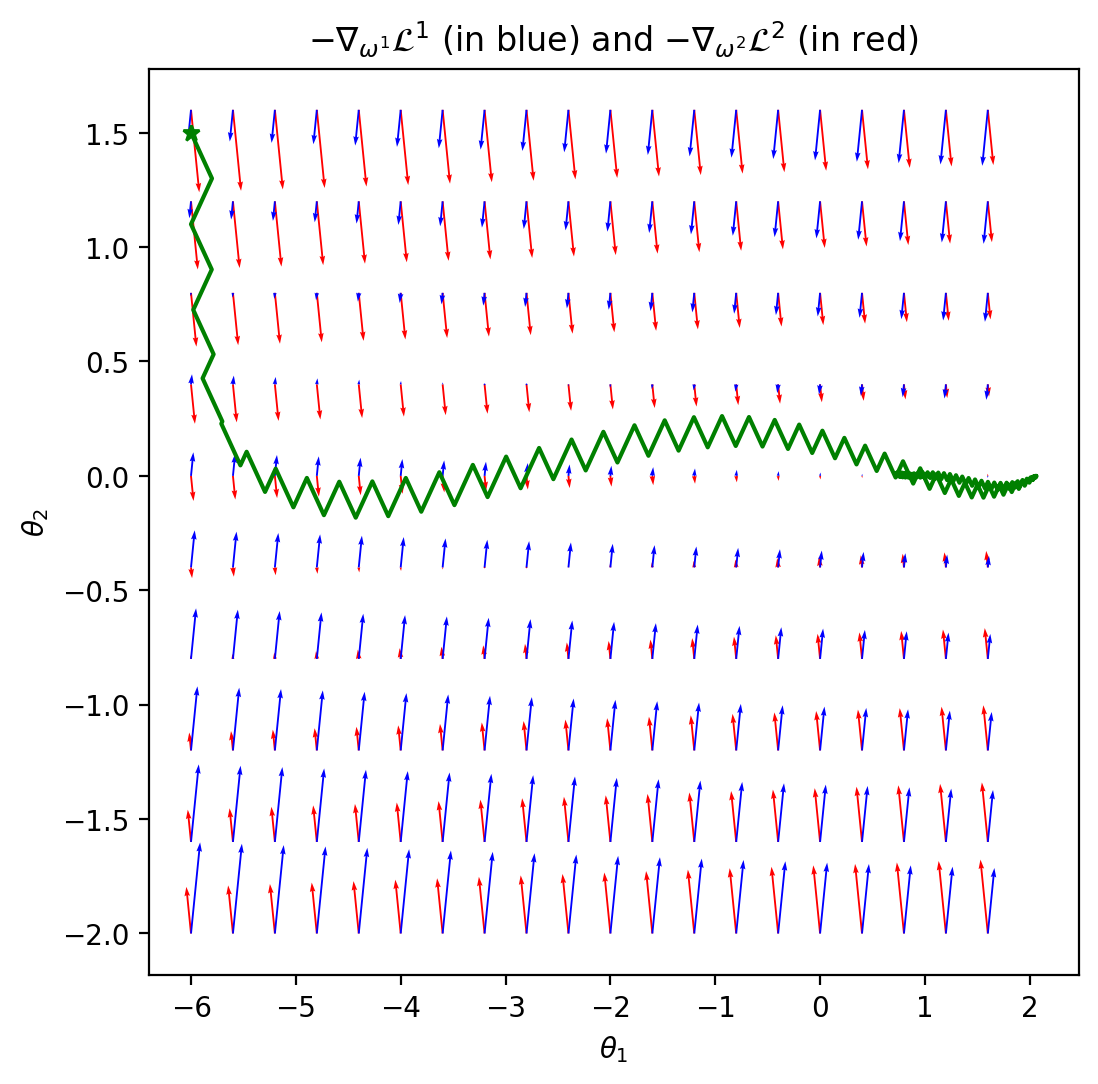

In [226]:
# TODO add Adam
plt.figure(figsize=(6,6), dpi=200)
beta = 10

# Optimization trajectory
lr = 0.2
pt = np.array([-6, 1.5])
env1_adam = Adam()
env2_adam = Adam()
plt.plot(pt[0],pt[1], marker="*", color="green")
all_points = []
all_points.append(pt.copy())
for _ in range(100):
    pt += lr*env1_adam.step(np.array([-pt[0] +1 + beta*pt[1], beta*(pt[0] - 1 - beta*pt[1])]))
    all_points.append(pt.copy())
    pt += lr*env2_adam.step(np.array([(-pt[0] +1 - beta*pt[1]), beta*(-pt[0] +1 - beta*pt[1])]))
    all_points.append(pt.copy())
plt.plot([pt[0] for pt in all_points], [pt[1] for pt in all_points], color="green", label="learning rate 0.01")
# print(all_points)

X, Y = np.meshgrid(np.arange(-6, 2, .4), np.arange(-2, 2, .4))
U1 = -(X-1 - beta*Y)
V1 = beta*(X-1 - beta*Y)
print(U1.shape)
U2 = -(X-1 + beta*Y)
V2 = -beta*(X-1 + beta*Y)
plt.quiver(X, Y, U1, V1, width=0.002, color="red")
plt.quiver(X, Y, U2, V2, width=0.002, color="blue")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.title(r"$-\nabla_{\omega^1}\mathcal{L}^1$ (in blue) and $-\nabla_{\omega^2}\mathcal{L}^2$ (in red)")
plt.show()

## More environments

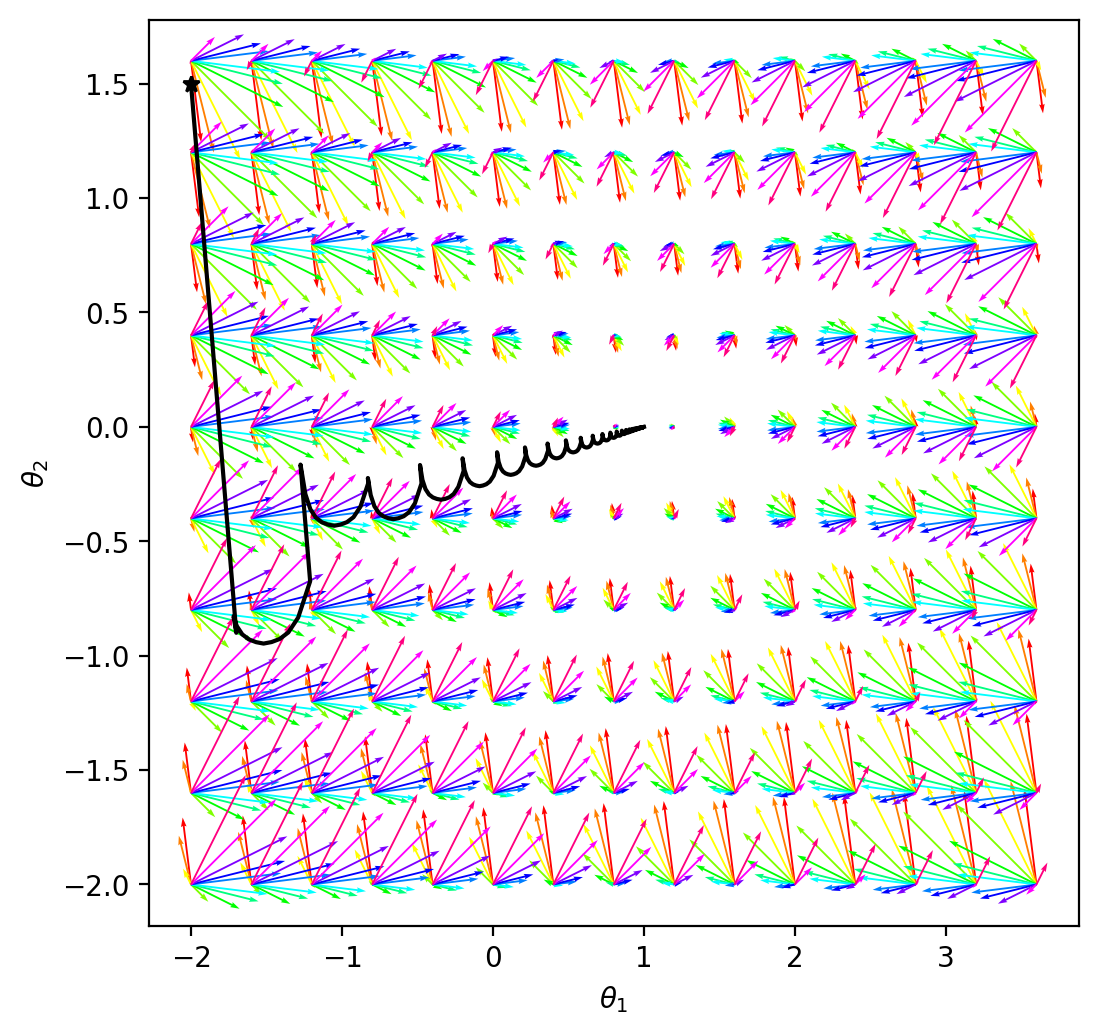

In [118]:
plt.figure(figsize=(6,6), dpi=200)
betas = [8, 4, 2, 1, 0.5, 0.25, 0.125, -0.125, -0.25, -0.5, -1, -2, -4, -8]
cmap = { 0:(255, 0, 0),
        1:(255, 127, 0),
        2:(255, 255, 0),
        3:(127, 255, 0),
        4:(0, 255, 0),
        5:(0, 255, 127),
        6:(0, 255, 255),
       7:(0, 127, 255),
       8:(0, 0, 255),
       9:(127, 0, 255),
       10:(255, 0, 255),
       11:(255, 0, 127)}

# Optimization trajectory
lr = 0.02
pt = [-2, 1.5]
pt_new = [-2, 1.5]
plt.plot(pt[0],pt[1], marker="*", color="black")
all_points = []
all_points.append(pt_new.copy())
for _ in range(200):
    for env in range(12):
        pt_new[0] = pt[0] + lr*(-pt[0] +1 + betas[env]*pt[1])  # Update by env1
        pt_new[1] = pt[1] + lr*betas[env]*(pt[0] - 1 - betas[env]*pt[1])  # Update by env1
        all_points.append(pt_new.copy())
        pt = pt_new.copy()
plt.plot([pt[0] for pt in all_points], [pt[1] for pt in all_points], color="black")


X, Y = np.meshgrid(np.arange(-2, 4, .4), np.arange(-2, 2, .4))
for i in range(12):
    U1 = -(X-1 - betas[i]*Y)
    V1 = betas[i]*(X-1 - betas[i]*Y)
    plt.quiver(X, Y, U1, V1, width=0.002, color=tuple(t/255. for t in cmap[i]))
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
# plt.legend()
plt.show()